# Clustering

## Read data from ‘Personal cost medical.csv’

In [1]:
#import library that need to use 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
df = pd.read_csv('insurance.csv')

### Basic Exploration & Data Cleaning & Feature Engineering

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#use for identification data type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#Finding missing values for each feature
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
num_data = df.select_dtypes(include='number')
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


#### Exploratory Data Analysis

c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

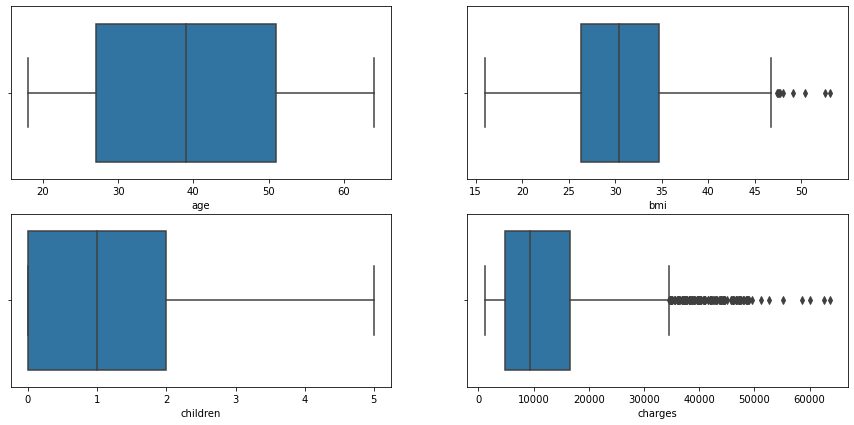

In [7]:
# Create count plots for all nominal features
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
for i, subplot in zip(num_data.columns, ax.flatten()):
    sns.boxplot(num_data[i], ax=subplot)

Text(0.5, 1.0, 'Distribution of charges by age and smoker')

<Figure size 864x720 with 0 Axes>

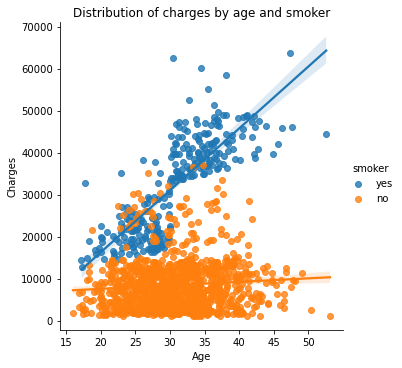

In [8]:
#The relationship between insurance claim amounts and age.
plt.figure(figsize = (12, 10))
sns.lmplot(x="bmi", y="charges", hue='smoker', data=df)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and smoker")

Text(0.5, 1.0, 'Distribution of charges by bmi and sex')

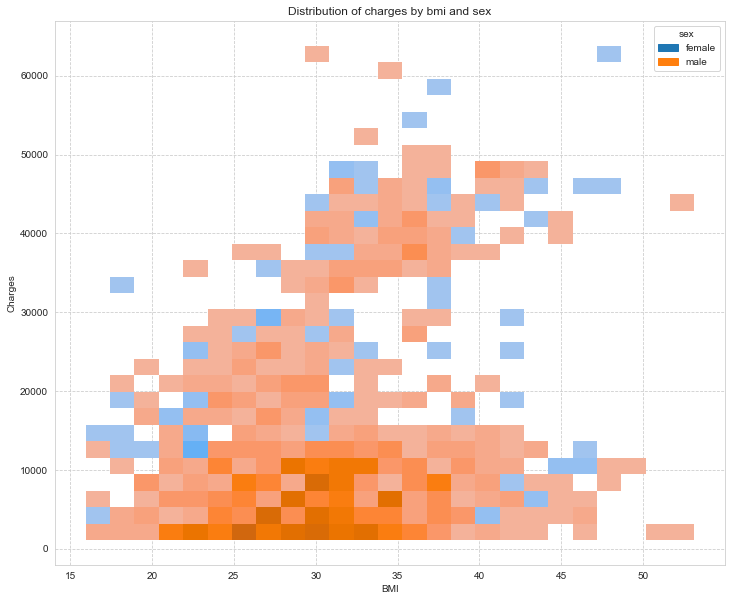

In [9]:
#The relationship between BMI and insurance claims.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.histplot(x = "bmi", y = "charges", hue="sex", data = df)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Distribution of charges by bmi and sex")

Text(0.5, 1.0, 'Distribution of Charges by Age and Region')

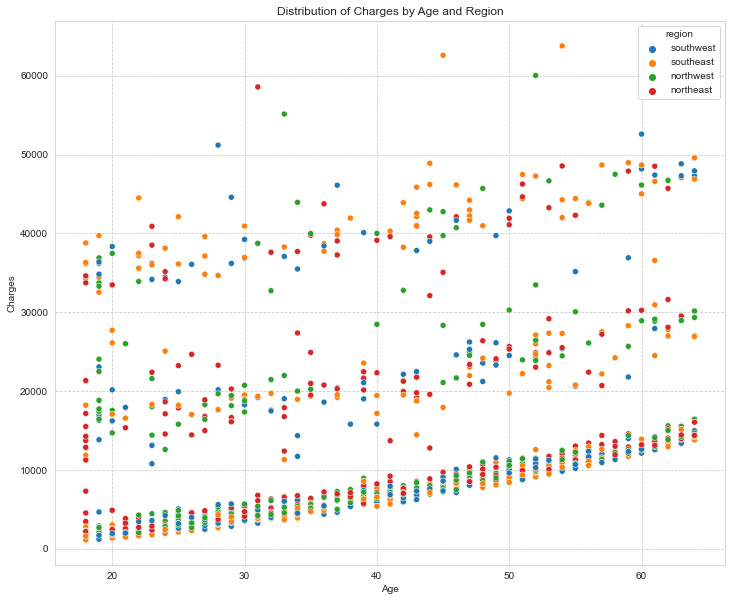

In [10]:
#The relationship between insurance claim amounts and age.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.scatterplot(x = "age", y = "charges", hue="region",data = df)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of Charges by Age and Region")

<AxesSubplot:>

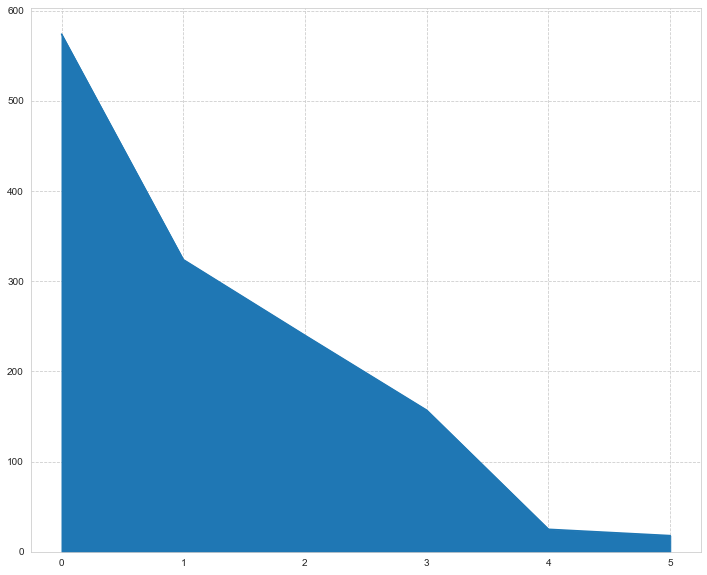

In [11]:
plt.figure(figsize=(12,10))
df['children'].value_counts().plot.area()

In [12]:
#get class data
cat_data = df.select_dtypes(include='object')
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [13]:
#boxplot for each feature
def boxplot(col_name):
    axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 7))
    sns.countplot(ax = axes[1], x = col_name , data = df, palette = 'magma')
    axes[1].set_title((col_name + ' count'), fontsize = 16)
    plt.subplots_adjust(hspace = 0.5)

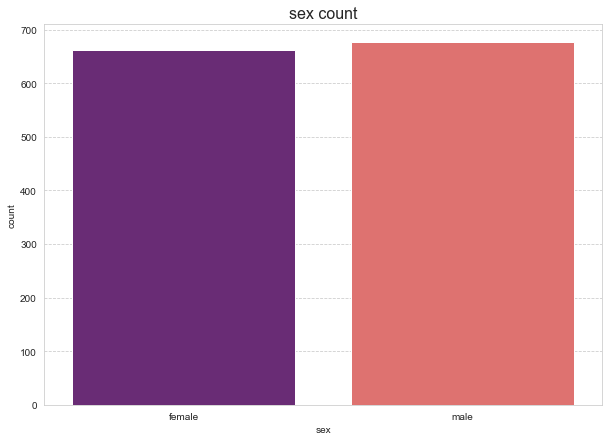

In [14]:
boxplot('sex')

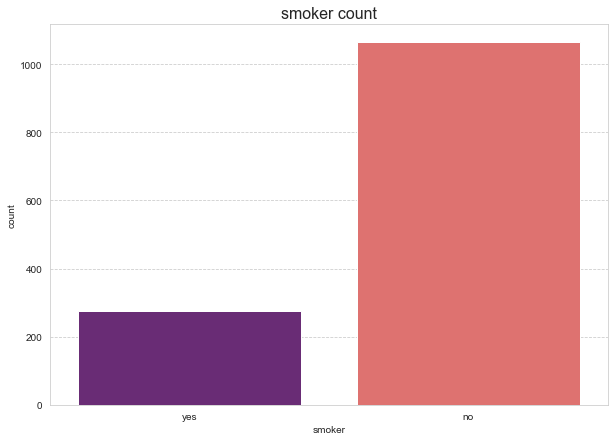

In [15]:
boxplot('smoker')

<AxesSubplot:ylabel='region'>

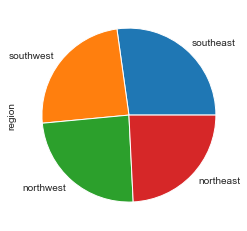

In [16]:
df['region'].value_counts().plot.pie()

In [17]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(cat_data)
cat_data

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [18]:
# Combine nominal and numeric features
df = pd.concat([num_data, cat_data], axis=1, sort=False)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Normalization

In [19]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(df)
X = pd.DataFrame(X, columns=df.columns)
X.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### Choosing an optimal number of cluster (k)

In [20]:
# Measure the quality of clusterings with different numbers of clusters using the inertia. 
# For each of the given values of k, perform the following steps:
#     Create a KMeans instance called model with k clusters.
#     Fit the model to the data.
#     Append the value of the inertia_ attribute of model to the list inertias.

from sklearn.cluster import KMeans

ks = range(1, 21) # for 1 to 20 clusters
sse = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    km = KMeans(n_clusters = k, random_state = 0)

    # Fit model to samples
    km.fit(X)

    # Append the inertia to the list of inertias
    sse.append(km.inertia_)

c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


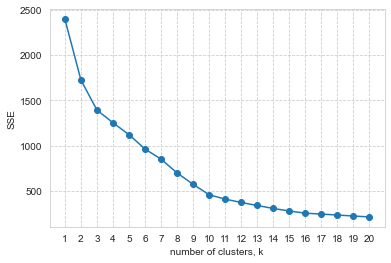

In [21]:
# Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!
import matplotlib.pyplot as plt

# Plot ks vs inertias
plt.plot(ks, sse, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

From the graph that k=10 is a good number of clusters, since it is a point where the SSE begins to decrease more slowly.

#### Choosing best model
Use Silhouette to compare several clustering model and then choose the best one to deploy.

In [22]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 15

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

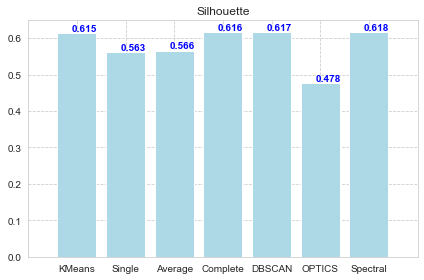

In [23]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [24]:
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

SpectralClustering(assign_labels='discretize', n_clusters=15)


##### Testing with other value of K range in 13-17, to observe accuracy. 

K = 13

In [25]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 13

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

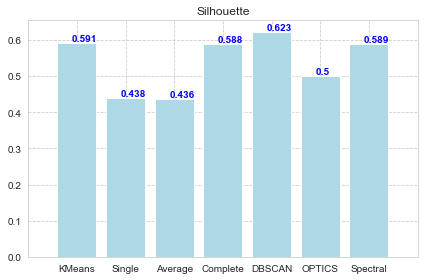

In [26]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [27]:
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

DBSCAN(min_samples=13)


K = 14

In [28]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 14

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

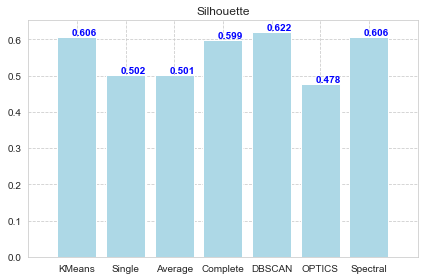

In [29]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [30]:
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

DBSCAN(min_samples=14)


K = 16

In [31]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 16

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

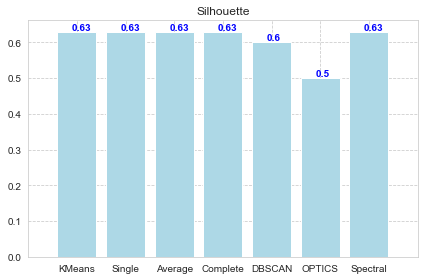

In [32]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [33]:
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

KMeans(n_clusters=16)


K = 17

In [34]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 17

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

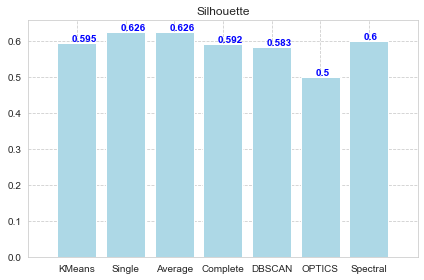

In [35]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

In [36]:
import operator
index, value = max(enumerate(scores), key=operator.itemgetter(1))

optimal_model = models[index]
print(optimal_model)

AgglomerativeClustering(linkage='single', n_clusters=17)


K = 10

In [37]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 10

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

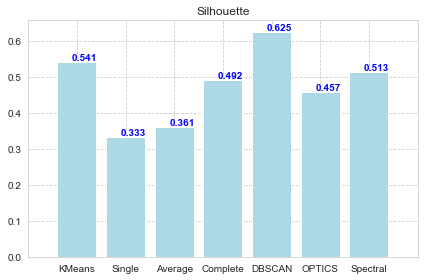

In [38]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

K = 8

In [39]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 8

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

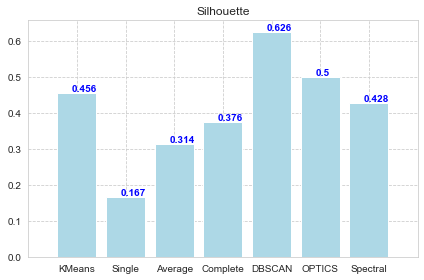

In [40]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

K = 9

In [41]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 9

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

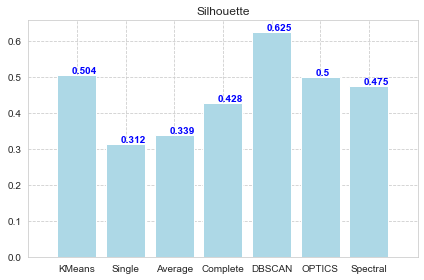

In [42]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

K = 11

In [43]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 11

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

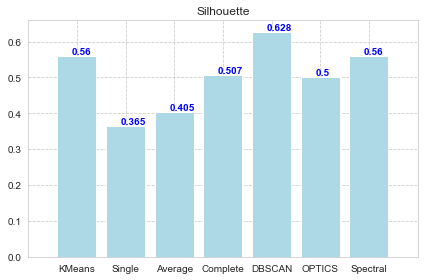

In [44]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

K = 12

In [45]:
# Experimenting with different classification models with Iris dataset (X)
# A higher Silhouette Coefficient score relates to a model with better defined clusters.
from sklearn.metrics import silhouette_score

scores = []
models = []

k = 12

#Applying kmeans to the dataset with the optimal k value
from sklearn.cluster import KMeans
km = KMeans(n_clusters = k)
y_km = km.fit_predict(X)
silhouette = silhouette_score(X, y_km)
scores.append(silhouette)
models.append(km)

# Agglomerative Clustering (single linkage)
from sklearn.cluster import AgglomerativeClustering
ac_s = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
y_ac_s = ac_s.fit_predict(X)
silhouette = silhouette_score(X, y_ac_s)
scores.append(silhouette)
models.append(ac_s)

# Agglomerative Clustering (average linkage)
from sklearn.cluster import AgglomerativeClustering
ac_a = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
y_ac_a = ac_a.fit_predict(X)
silhouette = silhouette_score(X, y_ac_a)
scores.append(silhouette)
models.append(ac_a)

# Agglomerative Clustering (complete linkage)
from sklearn.cluster import AgglomerativeClustering
ac_c = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
y_ac_c = ac_c.fit_predict(X)
silhouette = silhouette_score(X, y_ac_c)
scores.append(silhouette)
models.append(ac_c)

#DBSCAN
from sklearn.cluster import DBSCAN
SC_Clust = DBSCAN(eps=0.5, min_samples=k).fit(X)
y_SC_Clust = SC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SC_Clust)
scores.append(silhouette)
models.append(SC_Clust)

#OPTICS
from sklearn.cluster import OPTICS
OP_Clust = OPTICS(min_samples = k, xi = 0.05, min_cluster_size = 0.05).fit(X)
y_OP_Clust = OP_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_OP_Clust)
scores.append(silhouette)
models.append(OP_Clust)

#Spectral Clustering
from sklearn.cluster import SpectralClustering
SPC_Clust = SpectralClustering(n_clusters=k, assign_labels = 'discretize').fit(X)
y_SPC = SPC_Clust.fit_predict(X)
silhouette = silhouette_score(X, y_SPC)
scores.append(silhouette)
models.append(SPC_Clust)

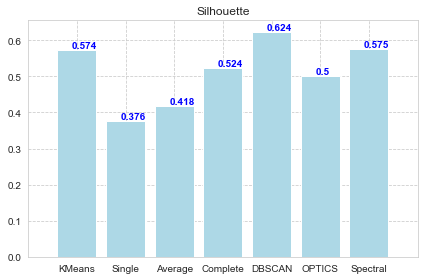

In [46]:
plt.title('Silhouette')
no_of_models = len(scores)
model_labels = ['KMeans', 'Single','Average','Complete', 'DBSCAN', 'OPTICS', 'Spectral']
plt.bar(range(no_of_models), scores, color='lightblue', align='center')
plt.xticks(range(no_of_models), model_labels)#, rotation=45)
plt.xlim([-1, no_of_models])

# set individual bar lables with accuracy value
for i, v in enumerate(scores):
    plt.text(i-0.1, v+0.005, str(round(v,3)), color='Blue', fontweight='bold')
    
plt.tight_layout()
plt.show()

## Combination with DBSCAN Clustering and Decision Tree Regression

### From above result, DBSCAN is the best algorithm to clustering model with dataset that we used. In regression, best model is Decision Tree Regression

### DBSCAN Clustering

Create model to clustering with dataset

In [47]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=1, min_samples=10)
y_db_sc = db_scan.fit_predict(X)
col_names = list(df.columns.values)

# append cluster labels to the last column of the dataset
result = pd.concat([pd.DataFrame(df,columns=col_names), pd.DataFrame(y_db_sc,columns=['Cluster_Labels']) ], axis=1)

#cluster label starts from 0
result.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Cluster_Labels
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,1
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,2
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,2


In [48]:
result.to_csv('Export data.csv')

#### What is SSE of the optimal model?

In [49]:
silhouette = silhouette_score(X, y_db_sc)
print("Silhouette Score: ", silhouette)

Silhouette Score:  0.6301055067547155


#### How many members for each clusters?

In [50]:
# Number of members in each cluster
result.Cluster_Labels.value_counts()

11    141
3     139
4     135
1     134
2     132
9     132
7     126
5     125
8      55
13     38
10     37
6      36
12     29
14     29
15     29
0      21
Name: Cluster_Labels, dtype: int64

Plot graph to see relation with cluster

Text(0.5, 1.0, 'Distribution of charges by age and Cluster Labels')

<Figure size 1080x504 with 0 Axes>

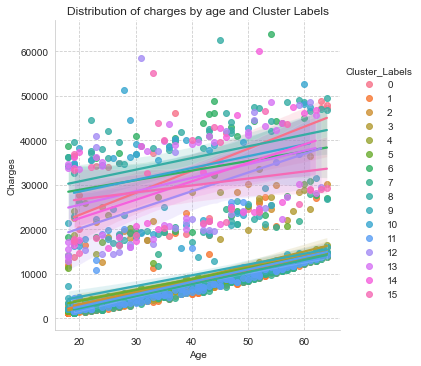

In [51]:
#The relationship between insurance claim amounts and age.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (15, 7))
sns.lmplot(x = "age", y = "charges", hue="Cluster_Labels", data = result)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and Cluster Labels")

Text(0.5, 1.0, 'Distribution of charges by BMI and Cluster Labels')

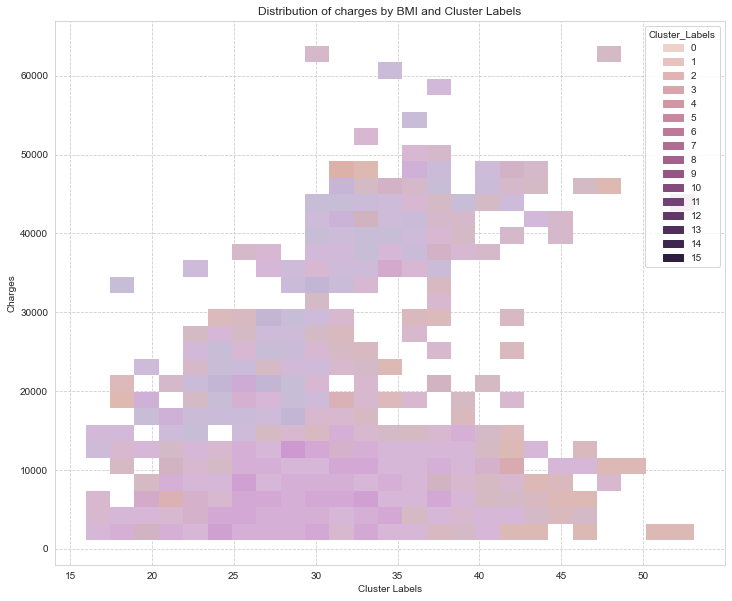

In [52]:
#The relationship between BMI and insurance claims.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.histplot(x = "bmi", y = "charges", hue="Cluster_Labels", data = result)
plt.xlabel("Cluster Labels")
plt.ylabel("Charges")
plt.title("Distribution of charges by BMI and Cluster Labels")

Text(0.5, 1.0, 'Distribution of charges by age and Cluster Labels')

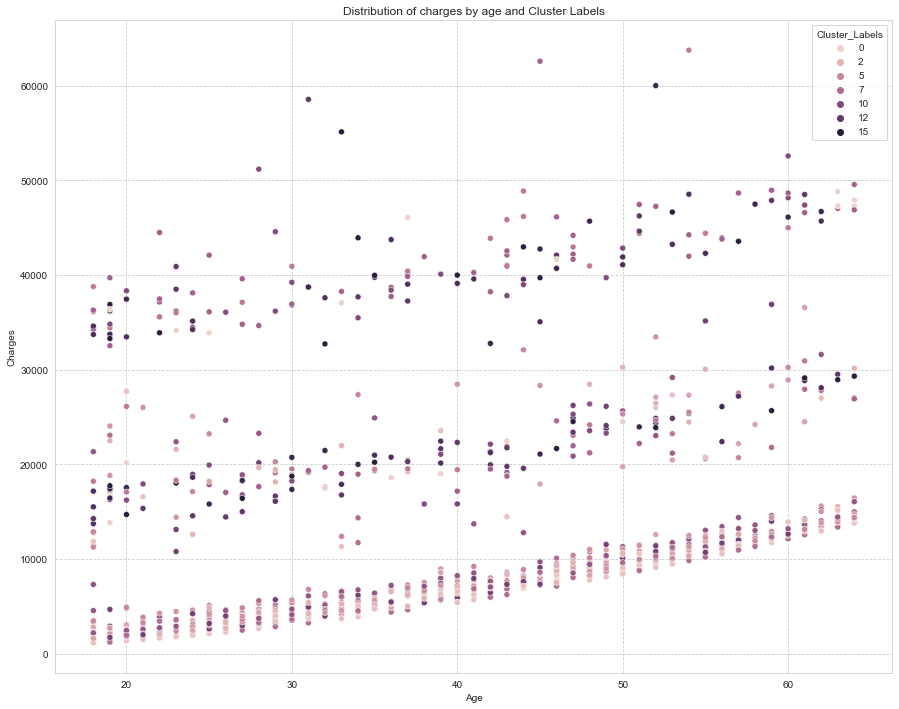

In [53]:
#The relationship between insurance claim amounts and age.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (15, 12))
sns.scatterplot(x = "age", y = "charges", hue="Cluster_Labels", data = result)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and Cluster Labels")

### Split data to X and Y for Regression

In [54]:
X = result[['age', 'bmi', 'children','sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast','region_southwest']]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [55]:
Y = result[['charges']]
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [57]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (936, 11)
x_test:  (402, 11)
y_train:  (936, 1)
y_test:  (402, 1)


### Model Preparetion

Cross Validation test

In [58]:
Linear = LinearRegression()
Dec = DecisionTreeRegressor()
Random = RandomForestRegressor()
MLP = MLPRegressor()
Lasso = linear_model.Lasso(alpha=0.1)

In [59]:
from sklearn.model_selection import cross_validate
cols = list(X.columns) 
mse = [] #array of mean_squared_error

# loop through each feature (column)
for i in cols: 
    LR = LinearRegression()
    cv_results = cross_validate(LR,X[[i]],Y, cv=10, scoring='neg_mean_squared_error')
    #LR.fit(x_train[[i]], y_train)
    #y_pred = LR.predict(x_test[[i]])
    mse.append(abs(cv_results['test_score']).mean())

In [60]:
# k-fold Cross Validation
# ===========================
#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate

#Step 2: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(Linear,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
#print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))
mse.append(abs(cv_results['test_score']).mean())

Cross Validation Mean Squared Error: 36990225.367 +/- 5705749.334


In [61]:
# k-fold Cross Validation
# ===========================
#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate

#step 2: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(Dec,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))
mse.append(abs(cv_results['test_score']).mean())

Cross Validation Mean Squared Error: 42294527.876 +/- 7033035.698


In [62]:
# k-fold Cross Validation
# ===========================
#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate

#step 2: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(Random,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))
mse.append(abs(cv_results['test_score']).mean())

c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\model_selection\_va

Cross Validation Mean Squared Error: 23684420.008 +/- 4993576.994


In [63]:
# k-fold Cross Validation
# ===========================
#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate

#step 2: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(MLP,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))
mse.append(abs(cv_results['test_score']).mean())

c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimi

Cross Validation Mean Squared Error: 137459335.761 +/- 18554101.748


c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
# k-fold Cross Validation
# ===========================
#Step 1: Import the sklearn classes
from sklearn.model_selection import cross_validate

#step 2: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(Lasso,X,Y, cv=10, scoring='neg_mean_squared_error')

# Accuracy score for each fold 
print('Cross Validation Mean Squared Error: %.3f +/- %.3f' % (abs(cv_results['test_score']).mean(), abs(cv_results['test_score']).std()))
mse.append(abs(cv_results['test_score']).mean())

Cross Validation Mean Squared Error: 36990091.346 +/- 5705388.457


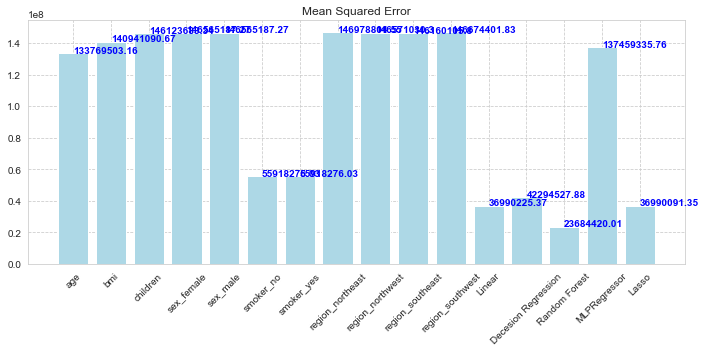

In [65]:
# Created a plot that compare mean_squared_error of each feature
f, ax = plt.subplots(figsize=(10,5))
plt.title('Mean Squared Error')
no_of_features = len(mse)
xlabels = list(X.columns) + ['Linear', 'Decesion Regression' , 'Random Forest', 'MLPRegressor', 'Lasso']
plt.bar(range(no_of_features), mse, color='lightblue', align='center')
plt.xticks(range(no_of_features), xlabels, rotation=45)

# set individual bar lables with accuracy value
for i, v in enumerate(mse):
    plt.text(i, v, str(round(v,2)), color='blue', fontweight='bold')

plt.tight_layout()
plt.show()

In [66]:
Linear = LinearRegression()
Dec = DecisionTreeRegressor()
Random = RandomForestRegressor()
MLP = MLPRegressor()
Lasso = linear_model.Lasso(alpha=0.1)

from sklearn.metrics import r2_score
#Linear
y_pred = Linear.fit(X,Y).predict(X)
R2_Linear = r2_score(Y, y_pred)
print("R2 Score Linear model on test data : %f" % R2_Linear)

#Decision Tree Regression
y_pred = Dec.fit(X,Y).predict(X)
R2_Dec = r2_score(Y, y_pred)
print("R2 Score Decision Tree regression on test data : %f" % R2_Dec)

#Random Forest Regression
y_pred = Random.fit(X,Y).predict(X)
R2_RAN = r2_score(Y, y_pred)
print("R2 Score Random Forest on test data : %f" % R2_RAN)

#MLP
y_pred = MLP.fit(X,Y).predict(X)
R2_MLP = r2_score(Y, y_pred)
print("R2 Score MLP on test data : %f" % R2_MLP)

#Lasso
y_pred = Lasso.fit(X,Y).predict(X)
R2_Lasso = r2_score(Y, y_pred)
print("R2 Score Lasso on test data : %f" % R2_Lasso)

R2 Score Linear model on test data : 0.750913
R2 Score Decision Tree regression on test data : 0.998667


C:\Users\CHIRAWATTANGJITUEBOO\AppData\Local\Temp\ipykernel_9076\133220091.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred = Random.fit(X,Y).predict(X)


R2 Score Random Forest on test data : 0.976355


c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 Score MLP on test data : 0.071808
R2 Score Lasso on test data : 0.750913


c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


From above chart, Random Forest regression give less MSE from all model

### Implement best model with entire data

In [67]:
RAN = RandomForestRegressor()

#Implement model with whole data
RAN.fit(X,Y)

C:\Users\CHIRAWATTANGJITUEBOO\AppData\Local\Temp\ipykernel_9076\3734744235.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RAN.fit(X,Y)


RandomForestRegressor()

In [68]:
X_new = pd.read_csv('insurance_sample.csv')
X_new.head()

,age,sex,bmi,children,smoker,region
0,36,female,22.000,3,no,southeast
1,23,male,39.820,0,yes,northwest
2,18,male,23.750,0,no,northeast
3,20,female,28.975,0,no,northwest
4,44,male,31.350,1,yes,northeast


In [69]:
#Seperate Numerical and Catgorical data
num_x = X_new.select_dtypes(include='number')
num_x.head()

,age,bmi,children
0,36,22.000,3
1,23,39.820,0
2,18,23.750,0
3,20,28.975,0
4,44,31.350,1


In [70]:
cat_x = X_new.select_dtypes(include='object')
cat_x.head()

,sex,smoker,region
0,female,no,southeast
1,male,yes,northwest
2,male,no,northeast
3,female,no,northwest
4,male,yes,northeast


In [71]:
#One hot encoding
cat_x = pd.get_dummies(cat_x)
cat_x.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,1,0,0,0,1,0
1,0,1,0,1,0,1,0,0
2,0,1,1,0,1,0,0,0
3,1,0,1,0,0,1,0,0
4,0,1,0,1,1,0,0,0


In [72]:
X_new = pd.concat([num_x, cat_x], axis=1, sort=False)
X_new.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,36,22.000,3,1,0,1,0,0,0,1,0
1,23,39.820,0,0,1,0,1,0,1,0,0
2,18,23.750,0,0,1,1,0,1,0,0,0
3,20,28.975,0,1,0,1,0,0,1,0,0
4,44,31.350,1,0,1,0,1,1,0,0,0


In [73]:
#Normalize data
X_new = mms.fit_transform(X_new)
X_new

array([[0.41860465, 0.19201995, 0.75      , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.11627907, 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.27136704, 0.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.04651163, 0.50827477, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.60465116, 0.6159601 , 0.25      , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.6744186 , 0.73226026, 0.75      , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.18604651, 0.49965994, 0.        , 1.        , 0.

### What are the forecast target values of the new data using the best classification model?

In [74]:
y_new_pred = RAN.predict(X_new)
y_new_pred

c:\Users\CHIRAWATTANGJITUEBOO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([ 2942.5226496, 15512.3593158,  2134.7356058,  2003.9720955,
       14908.288254 ,  2830.8529859,  2205.8300365, 15924.4915419,
        1769.6399085, 15755.5439148,  1723.8182958,  2205.8300365,
        2205.8300365,  1769.6399085,  2049.1159978,  2205.8300365,
        1950.8854469,  1723.8182958,  2049.1159978, 15846.6304318])

In [75]:
import pickle
pickle.dump(db_scan, open('Cluster.pkl', 'wb'))
pickle.dump(RAN, open('regression.pkl', 'wb'))
pickle.dump(mms, open('normalization.pkl', 'wb'))